### Введение
С развитием LLM-моделей спрашивать теоретическую часть или короткие алгоритмы и принципы стало бесполезно, поэтому задание будет одно, но комплексное и приближенное к реальности.

Вы можете использовать любые LLM-модели и Copilot для написания кода, так как в реальной работе сотрудники отдела также имеют доступ ко всем современным инструментам (Sonnet 3.5, GPT-4o, GitHub Copilot и т. п.).

В задании вы будете работать с тестовыми данными по банкоматам и API ЦБ РФ для получения ключевой ставки.

---

### Специфика данных fees
`fees` — тарифы за обслуживание банкомата инкассаторами. Так как банкоматы могут находиться в разных регионах, тарифы у них могут отличаться.

- **CashDeliveryFixedFee** — фиксированная стоимость доставки наличных (не зависит от суммы).
- **CashDeliveryPercentageFee** — процент от суммы доставленных наличных. Он добавляется к фиксированной стоимости. Если в таблице указано `0.0001`, это значит 0.01% от суммы.
- **CashDeliveryMinFee** — минимальная сумма, которую с нас возьмут по `CashDeliveryPercentageFee`. Например, если мы попросим инкассаторов в ATM_4 довезти всего 10 000 рублей, то с нас возьмут 5250 рублей (фиксированная стоимость), а так как `10 000 * 0.04% < 450 рублей`, то дополнительно возьмут ещё 450 рублей. Итог: 5250 + 450 рублей.

**CashCollection** — это пример сложного тарифа, который учитывает специфику работы с банкоматом. В банкомат деньги не докладывают, а меняют сразу кассету. Есть провайдеры, которые тарифицируют не только доставку, но и пересчёт денег в извлечённой кассете. Например, в ATM_4 у нас именно такой тариф.  
Пример: у нас в банкомате осталось 500 тыс. рублей, а мы хотим, чтобы у него был баланс 2 млн. Тогда мы заказываем довезти кассету на 2 млн. и платим по тарифу за доставку. При доставке старая кассета извлекается, и мы также по тарифу платим за пересчёт 500 тыс. рублей (0.45%, но не менее 1140 рублей).

- **CashCollectionFixedFee** — фиксированная стоимость за извлечение старой кассеты (в данных примерах нулевая).
- **CashCollectionPercentageFee** — процент от суммы извлечённой кассеты.
- **CashCollectionMinFee** — минимальная сумма, которую с нас возьмут по `CashCollectionPercentageFee`.

---

### Специфика данных transactions
Таблица содержит данные по снятиям, пополнениям (инкассациям) и балансу банкомата на конец дня.  
Считаем, что банкоматы в начале года пустые и не работали, поэтому баланс на конец дня равен 0, пока не случится первая инкассация.

- **bal_end_of_day** — баланс на конец дня.
- **cash_in** — пополнение в результате инкассации.
- **cash_out** — снятие наличных клиентами.

---

### Часть 1 — упущенный процентный доход

Специалисту по ML важно уметь получать данные с различных API и читать документацию. Для расчёта упущенного процентного дохода нужно обратиться к API ЦБ РФ и получить динамику ключевой ставки за 2024 год.

https://www.cbr.ru/DailyInfoWebServ/DailyInfo.asmx?op=KeyRate

Для запроса к API не нужен токен и регистрация. ЦБ РФ для части данных предпочитает использовать SOAP.

Учитывая, что хранить наличные деньги в банкомате — не самое удачное инвестиционное решение, посчитайте упущенный процентный доход для каждого банкомата. Рассчитываем, что банк мог бы вложить эти деньги и получить доход, равный ключевой ставке ЦБ РФ, актуальной на день баланса банкомата. Добавьте к таблице `transactions` столбец с упущенной процентной выгодой.


### Часть 2 - расходы на инкассацию

Теперь к данным по банкоматам, кроме упущенного процентного дохода, необходимо добавить столбец расходов на инкассацию. Для простоты считаем, что мы не платим за аренду помещения и страхование, поэтому нам достаточно данных по тарифам на инкассацию (`fees`).

### Часть 3 - анализ данных

Посмотрите на данные о снятиях, инкассациях и балансе. В данных подобраны банкоматы, отличающиеся по характеру использования и частоте инкассаций.  
(Эту операцию вы делаете для себя, чтобы лучше понять специфику.)

### Часть 4 - меняем бизнес с помощью ML

Заключительная и самая интересная часть. К данному этапу у нас уже рассчитан упущенный процентный доход и расходы на инкассацию. Подумайте, как использовать ваши знания, чтобы оптимизировать процесс инкассации и уменьшить издержки.

Для данной задачи считаем, что нас устроит Service Level на уровне 90%. Это значит, что если в 9 из 10 случаев наши клиенты получают нужные им суммы, нас это устраивает.

Напоминаем, что технически в банкомат нельзя довнести сумму, и кассета меняется полностью. Соответственно, с нас берут оплату за полную кассету (если вдруг решите подойти к задаче через классическую формулу EOQ).

Вы можете подойти к задаче абсолютно любым способом и использовать все возможности ООП, Python и любых библиотек. Всё как в реальной работе, где вас никто не ограничивает.

Эффективность своего решения вы можете показать с помощью ретротестирования. Считаем, что каждая кассета может вмещать абсолютно любые суммы. Чтобы добавить реализма, вы можете считать, что деньги нужно заказывать за 3 дня до их доставки.


### Заключение

Решение вы можете предоставить любым способом: репозиторий GitHub, Google Colab, конвертированный IPython Notebook в PDF и т. п.

По срокам вас не ограничивают, но учитывайте, что в это же время задачу могут решать и другие кандидаты. Таким образом, вы участвуете в конкурсе с ними.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from zeep import Client
pd.set_option('display.max_rows', 10)

In [2]:
# Забираем данные по тарфиам на обслуживание банкоматов
fees = pd.read_parquet('https://storage.yandexcloud.net/norvpublic/fees.parquet')
# статистика операция по дням.
transactions = pd.read_parquet('https://storage.yandexcloud.net/norvpublic/transactions.parquet')

In [3]:
fees

,ATM_ID,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee
0,ATM_1,1365.0,0.0001,NaN,NaN,NaN,NaN
1,ATM_2,1365.0,0.0001,NaN,NaN,NaN,NaN
2,ATM_4,5250.0,0.0004,450.0,0.0,0.0045,1140.0
3,ATM_3,2250.0,0.0001,675.0,NaN,NaN,NaN


In [4]:
transactions.loc[transactions.ATM_ID == "ATM_1"]

,date,ATM_ID,bal_end_of_day,cash_in,cash_out
0,2024-01-12 00:00:00+00:00,ATM_1,0.0,0.0,0.0
4,2024-01-13 00:00:00+00:00,ATM_1,0.0,0.0,0.0
8,2024-01-14 00:00:00+00:00,ATM_1,0.0,0.0,0.0
12,2024-01-15 00:00:00+00:00,ATM_1,0.0,0.0,0.0
16,2024-01-16 00:00:00+00:00,ATM_1,0.0,0.0,0.0
...,...,...,...,...,...
1156,2024-10-27 00:00:00+00:00,ATM_1,4311200.0,0.0,4000.0
1160,2024-10-28 00:00:00+00:00,ATM_1,4129300.0,0.0,181900.0
1164,2024-10-29 00:00:00+00:00,ATM_1,3703300.0,0.0,426000.0
1168,2024-10-30 00:00:00+00:00,ATM_1,3387100.0,0.0,316200.0


# Часть 1

In [5]:
#начальная дата
transactions.date.min()

Timestamp('2024-01-12 00:00:00+0000', tz='Etc/UTC')

In [6]:
#конечная дата
transactions.date.max()

Timestamp('2024-10-31 00:00:00+0000', tz='Etc/UTC')

In [7]:

# считаем данные о КС ЦБРФ
from zeep import Client

# Подключаемся к WSDL
wsdl_url = "https://www.cbr.ru/DailyInfoWebServ/DailyInfo.asmx?WSDL"
client = Client(wsdl_url)

try:
    # Запрашиваем данные
    response = client.service.KeyRate("2024-01-12", "2024-10-31")
except Exception as e:
    print(f"Ошибка: {e}")
    
key_rate_data = response['_value_1']['_value_1']

key_rate_df = pd.DataFrame([{'Date': item['KR']['DT'], 'Rate': item['KR']['Rate']} for item in key_rate_data])
key_rate_df.columns = ["date", "key_rate"]

key_rate_df

Forcing soap:address location to HTTPS
Forcing soap:address location to HTTPS


,date,key_rate
0,2024-10-31 00:00:00+03:00,21.00
1,2024-10-30 00:00:00+03:00,21.00
2,2024-10-29 00:00:00+03:00,21.00
3,2024-10-28 00:00:00+03:00,21.00
4,2024-10-25 00:00:00+03:00,19.00
...,...,...
201,2024-01-18 00:00:00+03:00,16.00
202,2024-01-17 00:00:00+03:00,16.00
203,2024-01-16 00:00:00+03:00,16.00
204,2024-01-15 00:00:00+03:00,16.00


In [8]:
key_rate_df.value_counts()

date                       key_rate
2024-01-12 00:00:00+03:00  16.00       1
2024-08-02 00:00:00+03:00  18.00       1
2024-07-19 00:00:00+03:00  16.00       1
2024-07-22 00:00:00+03:00  16.00       1
2024-07-23 00:00:00+03:00  16.00       1
                                      ..
2024-04-24 00:00:00+03:00  16.00       1
2024-04-25 00:00:00+03:00  16.00       1
2024-04-26 00:00:00+03:00  16.00       1
2024-04-27 00:00:00+03:00  16.00       1
2024-10-31 00:00:00+03:00  21.00       1
Length: 206, dtype: int64

Замерджим ставку в df transactions для удобства

In [9]:
# в столбцах date оставим только год месяц и день
transactions.date = transactions.date.apply(str).apply(lambda x: x.split()[0]) 
key_rate_df.date = key_rate_df.date.apply(str).apply(lambda x: x.split()[0])

transactions = transactions.merge(key_rate_df, on="date", how="left")
print("Кол-ва nan:", transactions.isna().sum())

Кол-ва nan: date                0
ATM_ID              0
bal_end_of_day      0
cash_in             0
cash_out            0
key_rate          352
dtype: int64


In [10]:
# заполним nan ближайшими предыдущими значениями

transactions.key_rate = transactions.key_rate.fillna(method='ffill')
print("Кол-ва nan:", transactions.isna().sum())

Кол-ва nan: date              0
ATM_ID            0
bal_end_of_day    0
cash_in           0
cash_out          0
key_rate          0
dtype: int64


In [11]:
transactions

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate
0,2024-01-12,ATM_1,0.0,0.0,0.0,16.00
1,2024-01-12,ATM_2,0.0,0.0,0.0,16.00
2,2024-01-12,ATM_3,0.0,0.0,0.0,16.00
3,2024-01-12,ATM_4,0.0,0.0,0.0,16.00
4,2024-01-13,ATM_1,0.0,0.0,0.0,16.00
...,...,...,...,...,...,...
1171,2024-10-30,ATM_4,747650.0,0.0,1000.0,21.00
1172,2024-10-31,ATM_1,3215500.0,0.0,171600.0,21.00
1173,2024-10-31,ATM_2,4754600.0,0.0,395100.0,21.00
1174,2024-10-31,ATM_3,2277000.0,0.0,1000.0,21.00


In [12]:
# добавим потенциальную прибыль если баланс банкомата на конец дня вложить на вклад на 1 день под процент равный ключевой ставке

transactions["UPD"] = (transactions.bal_end_of_day.apply(int) * (transactions.key_rate / 100) / 365).apply(int)
transactions

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD
0,2024-01-12,ATM_1,0.0,0.0,0.0,16.00,0
1,2024-01-12,ATM_2,0.0,0.0,0.0,16.00,0
2,2024-01-12,ATM_3,0.0,0.0,0.0,16.00,0
3,2024-01-12,ATM_4,0.0,0.0,0.0,16.00,0
4,2024-01-13,ATM_1,0.0,0.0,0.0,16.00,0
...,...,...,...,...,...,...,...
1171,2024-10-30,ATM_4,747650.0,0.0,1000.0,21.00,430
1172,2024-10-31,ATM_1,3215500.0,0.0,171600.0,21.00,1850
1173,2024-10-31,ATM_2,4754600.0,0.0,395100.0,21.00,2735
1174,2024-10-31,ATM_3,2277000.0,0.0,1000.0,21.00,1310


In [13]:
fees

,ATM_ID,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee
0,ATM_1,1365.0,0.0001,NaN,NaN,NaN,NaN
1,ATM_2,1365.0,0.0001,NaN,NaN,NaN,NaN
2,ATM_4,5250.0,0.0004,450.0,0.0,0.0045,1140.0
3,ATM_3,2250.0,0.0001,675.0,NaN,NaN,NaN


# Часть 2

In [14]:
# замерджим fees к transactions для удобства

transactions = transactions.merge(fees, on="ATM_ID", how="left").fillna(0)
transactions.head()

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee
0,2024-01-12,ATM_1,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0
1,2024-01-12,ATM_2,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0
2,2024-01-12,ATM_3,0.0,0.0,0.0,16.00,0,2250.0,0.0001,675.0,0.0,0.0000,0.0
3,2024-01-12,ATM_4,0.0,0.0,0.0,16.00,0,5250.0,0.0004,450.0,0.0,0.0045,1140.0
4,2024-01-13,ATM_1,0.0,0.0,0.0,16.00,0,1365.0,0.0001,0.0,0.0,0.0000,0.0


In [15]:
# затраты за доставку
transactions.loc[transactions['cash_in'] > 0, 'CashDeliveryCost'] = (
    transactions['cash_in'] * transactions['CashDeliveryPercentageFee']
).clip(lower=transactions['CashDeliveryMinFee']) + transactions['CashDeliveryFixedFee']


# затраты за касету с деньгами
transactions.loc[(transactions['cash_in'] > 0), 'CashCollectionCost'] = (
    ( transactions['bal_end_of_day'] - transactions['cash_in']) * transactions['CashCollectionPercentageFee']
).clip(lower=transactions['CashCollectionMinFee']) + transactions.loc[transactions['cash_in'] > 0]['CashCollectionFixedFee']


transactions['TotalFee'] = transactions['CashDeliveryCost'].fillna(0) + transactions['CashCollectionCost'].fillna(0)
transactions = transactions.fillna(0)
transactions[transactions.cash_in > 0]

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee,CashDeliveryCost,CashCollectionCost,TotalFee
21,2024-01-17,ATM_2,7119900.0,7120000.0,100.0,16.00,3121,1365.0,0.0001,0.0,0.0,0.0000,0.0,2077.0,0.0,2077.0
23,2024-01-17,ATM_4,1630000.0,1630000.0,0.0,16.00,714,5250.0,0.0004,450.0,0.0,0.0045,1140.0,5902.0,1140.0,7042.0
29,2024-01-19,ATM_2,6072400.0,7120000.0,1047600.0,16.00,2661,1365.0,0.0001,0.0,0.0,0.0000,0.0,2077.0,0.0,2077.0
42,2024-01-22,ATM_3,5609800.0,5610000.0,200.0,16.00,2459,2250.0,0.0001,675.0,0.0,0.0000,0.0,2925.0,0.0,2925.0
44,2024-01-23,ATM_1,6525100.0,6620000.0,94900.0,16.00,2860,1365.0,0.0001,0.0,0.0,0.0000,0.0,2027.0,0.0,2027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2024-10-09,ATM_1,6158000.0,6420000.0,262000.0,19.00,3205,1365.0,0.0001,0.0,0.0,0.0000,0.0,2007.0,0.0,2007.0
1105,2024-10-14,ATM_2,6412000.0,6420000.0,8000.0,19.00,3337,1365.0,0.0001,0.0,0.0,0.0000,0.0,2007.0,0.0,2007.0
1106,2024-10-14,ATM_3,2884300.0,2940000.0,55700.0,19.00,1501,2250.0,0.0001,675.0,0.0,0.0000,0.0,2925.0,0.0,2925.0
1136,2024-10-22,ATM_1,5819900.0,6420000.0,600100.0,19.00,3029,1365.0,0.0001,0.0,0.0,0.0000,0.0,2007.0,0.0,2007.0


# Часть 3

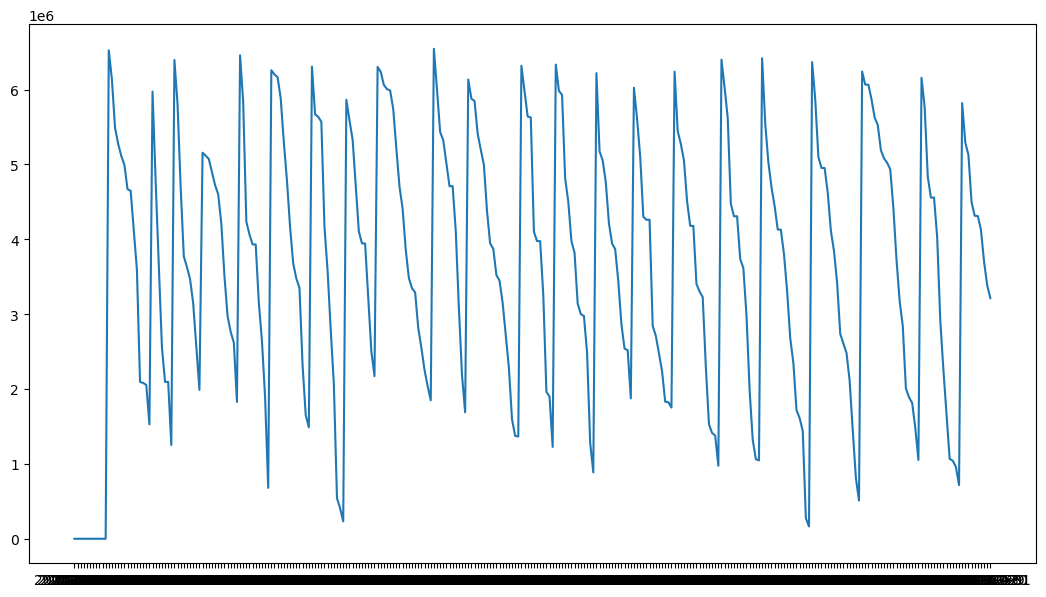

In [16]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df1 = transactions[transactions.ATM_ID == "ATM_1"].copy()
plt.plot(df1["date"], df1["bal_end_of_day"], )

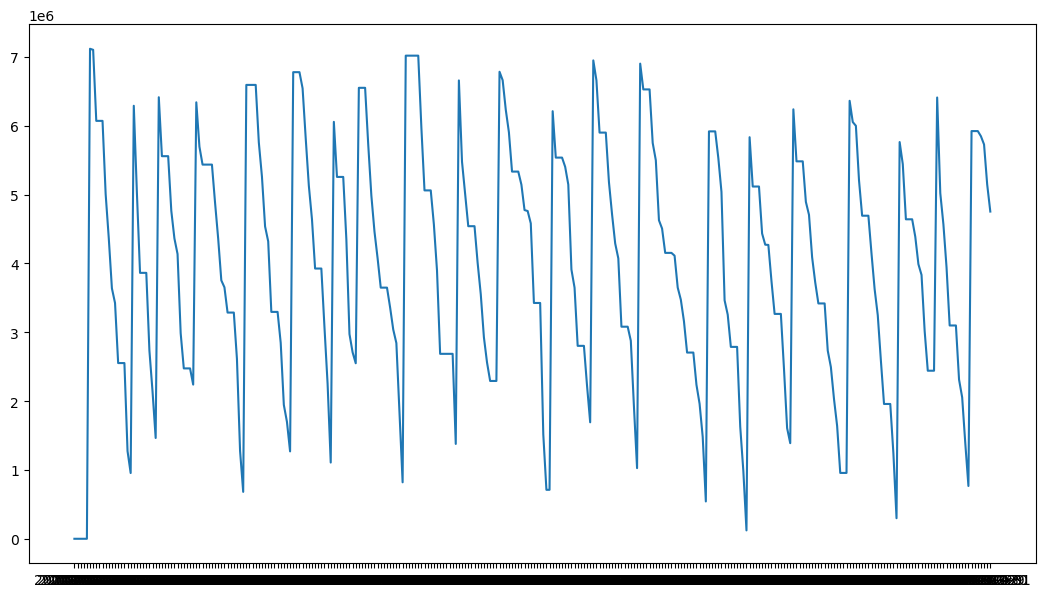

In [17]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df2 = transactions[transactions.ATM_ID == "ATM_2"].copy()
plt.plot(df2["date"], df2["bal_end_of_day"], )

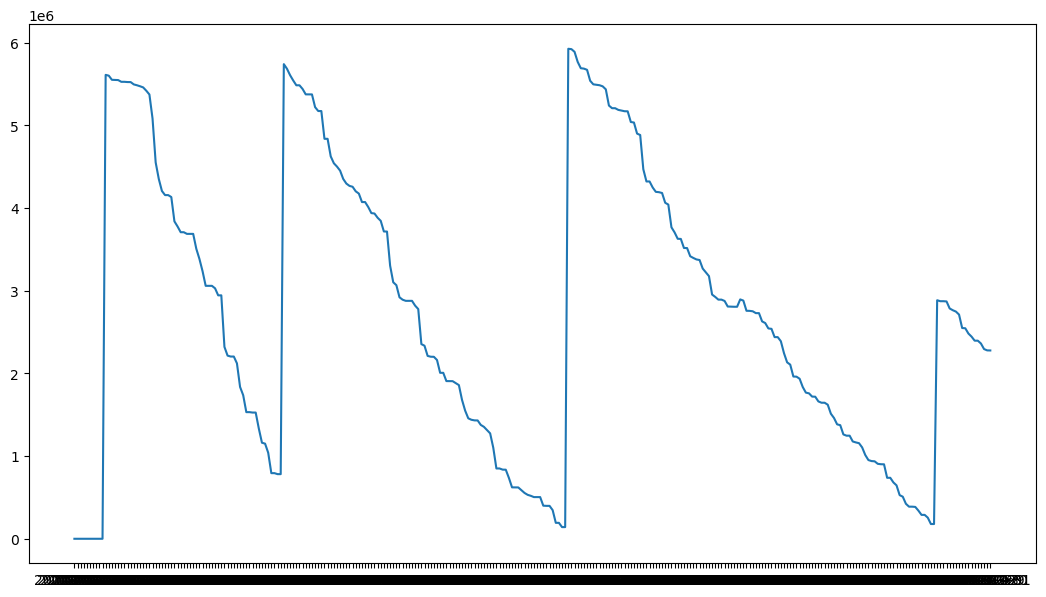

In [18]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df3 = transactions[transactions.ATM_ID == "ATM_3"].copy()
plt.plot(df3["date"], df3["bal_end_of_day"], )

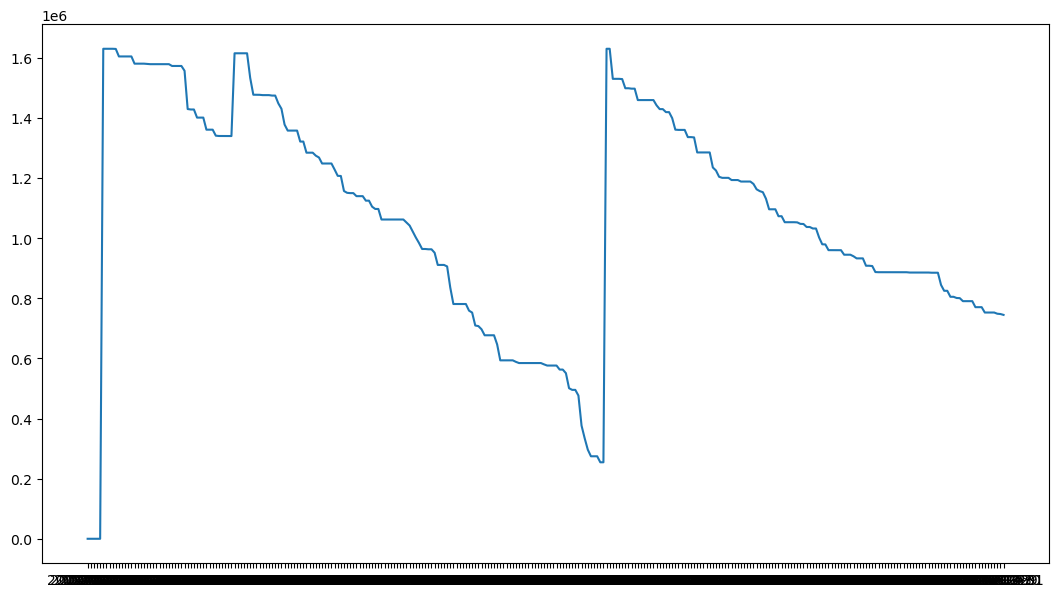

In [19]:
plt.figure(figsize=(13, 7))  # Указываем ширину и высоту графика в дюймах
df4 = transactions[transactions.ATM_ID == "ATM_4"].copy()
plt.plot(df4["date"], df4["bal_end_of_day"], )

# 4 часть

In [20]:
df1 = df1.reset_index(drop=True)
df1 = df1.loc[df1.cash_out > 0].reset_index(drop=True)
df1

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee,CashDeliveryCost,CashCollectionCost,TotalFee
0,2024-01-23,ATM_1,6525100.0,6620000.0,94900.0,16.00,2860,1365.0,0.0001,0.0,0.0,0.0,0.0,2027.0,0.0,2027.0
1,2024-01-24,ATM_1,6137500.0,0.0,387600.0,16.00,2690,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-25,ATM_1,5490100.0,0.0,647400.0,16.00,2406,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-26,ATM_1,5276200.0,0.0,213900.0,16.00,2312,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-27,ATM_1,5113500.0,0.0,162700.0,16.00,2241,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2024-10-27,ATM_1,4311200.0,0.0,4000.0,19.00,2244,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,2024-10-28,ATM_1,4129300.0,0.0,181900.0,21.00,2375,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,2024-10-29,ATM_1,3703300.0,0.0,426000.0,21.00,2130,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,2024-10-30,ATM_1,3387100.0,0.0,316200.0,21.00,1948,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def calculate_column_c(row, df):
    
    index = row.name
    
    if index < 2:
        return 0
    
    value_a = row['cash_out']
    value_b_minus_1 = df.at[index - 1, 'cash_out'] 
    value_b_minus_2 = df.at[index - 2, 'cash_out'] 

    return value_a + value_b_minus_1 + value_b_minus_2

In [22]:
def calculate_max_sum(df):
    # создадим столбец с общей суммой снятий за последние 3 дня 
    df = df.loc[df1.cash_out > 0] # оставим только те дни, в которых снималась наличка
    df = df.reset_index(drop=True)

    df["3_cash_outs"] = df.apply(calculate_column_c, axis=1 ,args=[df]) 
    
    max_sum = np.percentile(df["3_cash_outs"], 90) # максимальная сумма в банкомате при которой мы будем привозить новые деньги
    
    return max_sum

In [23]:
new_df1 = df1.copy()
new_df1

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee,CashDeliveryCost,CashCollectionCost,TotalFee
0,2024-01-23,ATM_1,6525100.0,6620000.0,94900.0,16.00,2860,1365.0,0.0001,0.0,0.0,0.0,0.0,2027.0,0.0,2027.0
1,2024-01-24,ATM_1,6137500.0,0.0,387600.0,16.00,2690,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-25,ATM_1,5490100.0,0.0,647400.0,16.00,2406,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-26,ATM_1,5276200.0,0.0,213900.0,16.00,2312,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-27,ATM_1,5113500.0,0.0,162700.0,16.00,2241,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2024-10-27,ATM_1,4311200.0,0.0,4000.0,19.00,2244,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,2024-10-28,ATM_1,4129300.0,0.0,181900.0,21.00,2375,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,2024-10-29,ATM_1,3703300.0,0.0,426000.0,21.00,2130,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,2024-10-30,ATM_1,3387100.0,0.0,316200.0,21.00,1948,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def simulate(df, start_eoq, end_eoq, step=50000): # фугкция имитации деятельности банкомата, прогоняем разли
    arr_days_count = []
    all_kr_losses = []
    all_dilevery_losses = []
    all_all_losses = []
    
    max_sum = calculate_max_sum(df)
    
    
    for eoq in range(start_eoq, end_eoq, step): #прогоняем различную сумму для поплнения банокмата 
        bal_end_of_day_arr = [start_eoq]
        cash_in_arr = [start_eoq]
        cash_out_arr = list(df.cash_out)
        cash_in_arr.extend([0] * (len(cash_out_arr) - 1))
    
        i = 0
        while i != len(cash_out_arr) - 1:
            
            bal_end_of_day_arr[i] = bal_end_of_day_arr[i] - cash_out_arr[i]
            bal_end_of_day_arr.append(bal_end_of_day_arr[i])
            i += 1
            
            if i == len(cash_out_arr) - 1:
                break
            
            if bal_end_of_day_arr[i] < max_sum:
                
                # первый день после того как сумма меньше sum_max
                bal_end_of_day_arr[i] = bal_end_of_day_arr[i] - cash_out_arr[i]
                bal_end_of_day_arr.append(bal_end_of_day_arr[i])
                i += 1 
                
                if i == len(cash_out_arr) - 1:
                    break
                
                # второй день после того как сумма меньше sum_max
                bal_end_of_day_arr[i] = bal_end_of_day_arr[i] - cash_out_arr[i]
                bal_end_of_day_arr.append(bal_end_of_day_arr[i])
                i += 1
                
                if i == len(cash_out_arr) - 1:
                    break
                
                # третий день после того как сумма меньше sum_max
                bal_end_of_day_arr[i] = bal_end_of_day_arr[i] - cash_out_arr[i]
                bal_end_of_day_arr.append(bal_end_of_day_arr[i])
                i += 1
                if i == len(cash_out_arr) - 1:
                    break
                
                cash_in_arr[i] = eoq
                bal_end_of_day_arr[i] = eoq
        
        df.bal_end_of_day = pd.Series(bal_end_of_day_arr)
        df.cash_in = pd.Series(cash_in_arr)
        df.cash_out = pd.Series(cash_out_arr)
    
    
        df["UPD"] = (df.bal_end_of_day.apply(int) * (df.key_rate / 100) / 365).apply(int)
        
        
        df.loc[df['cash_in'] > 0, 'CashDeliveryCost'] = (
            df['cash_in'] * df['CashDeliveryPercentageFee']
        ).clip(lower=df['CashDeliveryMinFee']) + df['CashDeliveryFixedFee']
        
        df.loc[(df['cash_in'] > 0), 'CashCollectionCost'] = (
            ( df['bal_end_of_day'] - df['cash_in']) * df['CashCollectionPercentageFee']
        ).clip(lower=df['CashCollectionMinFee']) + df.loc[df['cash_in'] > 0]['CashCollectionFixedFee']
        
        if df.CashCollectionCost.min() < 0:
            df.loc[df.CashCollectionCost < 0, "CashCollectionCost"] = 0
        
        
        df['TotalFee'] = df['CashDeliveryCost'].fillna(0) + df['CashCollectionCost'].fillna(0)
        df = df.fillna(0)
        
        kr_losses = df.UPD.sum() # потери из-за ключевой ставки
        divevery_losses = df.TotalFee.sum() #затраты на доставку
        
        all_losses = kr_losses + divevery_losses # все затраты
        
        all_all_losses.append(all_losses)
        all_dilevery_losses.append(divevery_losses)
        all_kr_losses.append(kr_losses)
        arr_days_count.append(len(df.loc[df.bal_end_of_day < 0, "bal_end_of_day"]) / len(df.bal_end_of_day))
        
    df_resualts = pd.DataFrame({"all_losses" : all_all_losses,\
                           "divevery_losses" : all_dilevery_losses, \
                           "kr_losses" : all_kr_losses, \
                           "доля дней когда денег не хватало" : arr_days_count}, index=range(start_eoq, end_eoq, step))
    return df_resualts
        
        

БАНКОМАТ 1

In [32]:
df1

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee,CashDeliveryCost,CashCollectionCost,TotalFee
0,2024-01-23,ATM_1,6525100.0,6620000.0,94900.0,16.00,2860,1365.0,0.0001,0.0,0.0,0.0,0.0,2027.0,0.0,2027.0
1,2024-01-24,ATM_1,6137500.0,0.0,387600.0,16.00,2690,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-25,ATM_1,5490100.0,0.0,647400.0,16.00,2406,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-26,ATM_1,5276200.0,0.0,213900.0,16.00,2312,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-27,ATM_1,5113500.0,0.0,162700.0,16.00,2241,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2024-10-27,ATM_1,4311200.0,0.0,4000.0,19.00,2244,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,2024-10-28,ATM_1,4129300.0,0.0,181900.0,21.00,2375,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,2024-10-29,ATM_1,3703300.0,0.0,426000.0,21.00,2130,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,2024-10-30,ATM_1,3387100.0,0.0,316200.0,21.00,1948,1365.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
simulate(df1.copy(), 2000000, 2600000).head(10)

,all_losses,divevery_losses,kr_losses,доля дней когда денег не хватало
2000000,255053.0,140799.0,114254,0.125461
2050000,261549.0,141134.0,120415,0.103321
2100000,291769.0,164145.0,127624,0.092251
2150000,335529.0,204064.0,131465,0.107011
2200000,376908.0,238270.0,138638,0.073801
2250000,400732.0,258546.0,142186,0.070111
2300000,406592.0,260551.0,146041,0.070111
2350000,419367.0,270800.0,148567,0.077491
2400000,445410.0,289761.0,155649,0.062731
2450000,456547.0,296526.0,160021,0.055351


Оптимальная сумма пополнения для банкомата 1 типа 2,2 млн.

БАНКОМАТ 2

In [34]:
# создадим столбец с общей суммой снятий за последние 3 дня 
df2 = df2.loc[df2.cash_out > 0] # оставим только те дни, в которых снималась наличка
df2 = df2.reset_index(drop=True)
calculate_max_sum(df2)

2457880.0

In [46]:
simulate(df2.copy(), 2700000, 7000000).head(10)

,all_losses,divevery_losses,kr_losses,доля дней когда денег не хватало
2700000,227770.0,115818.0,111952,0.125
2750000,233081.0,117683.0,115398,0.095
2800000,254553.0,135586.0,118967,0.090
2850000,272829.0,152815.0,120014,0.100
2900000,294569.0,170331.0,124238,0.090
2950000,304254.0,176075.0,128179,0.105
3000000,320257.0,191290.0,128967,0.105
3050000,328848.0,196535.0,132313,0.100
3100000,350251.0,213073.0,137178,0.090
3150000,360161.0,221778.0,138383,0.080


Оптимальная сумма пополнения для банкомата 2 типа  3,1 млн.

БАНКОМАТ 3

In [36]:
# создадим столбец с общей суммой снятий за последние 3 дня 
df3 = df3.loc[df3.cash_out > 0] # оставим только те дни, в которых снималась наличка
df3 = df3.reset_index(drop=True)
calculate_max_sum(df3)

414520.0

In [37]:
df3

,date,ATM_ID,bal_end_of_day,cash_in,cash_out,key_rate,UPD,CashDeliveryFixedFee,CashDeliveryPercentageFee,CashDeliveryMinFee,CashCollectionFixedFee,CashCollectionPercentageFee,CashCollectionMinFee,CashDeliveryCost,CashCollectionCost,TotalFee
0,2024-01-22,ATM_3,5609800.0,5610000.0,200.0,16.00,2459,2250.0,0.0001,675.0,0.0,0.0,0.0,2925.0,0.0,2925.0
1,2024-01-23,ATM_3,5599700.0,0.0,10100.0,16.00,2454,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-24,ATM_3,5549700.0,0.0,50000.0,16.00,2432,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-25,ATM_3,5547700.0,0.0,2000.0,16.00,2431,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-26,ATM_3,5546600.0,0.0,1100.0,16.00,2431,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2024-10-26,ATM_3,2395400.0,0.0,48900.0,19.00,1246,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0
240,2024-10-28,ATM_3,2361400.0,0.0,34000.0,21.00,1358,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0
241,2024-10-29,ATM_3,2294000.0,0.0,67400.0,21.00,1319,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0
242,2024-10-30,ATM_3,2278000.0,0.0,16000.0,21.00,1310,2250.0,0.0001,675.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
simulate(df3.copy(), 350000, 450000, 10000).head(10)


,all_losses,divevery_losses,kr_losses,доля дней когда денег не хватало
350000,207878.0,187200.0,20678,0.118852
360000,208994.0,187200.0,21794,0.106557
370000,210098.0,187200.0,22898,0.106557
380000,211207.0,187200.0,24007,0.098361
390000,212314.0,187200.0,25114,0.094262
400000,213424.0,187200.0,26224,0.090164
410000,214541.0,187200.0,27341,0.090164
420000,361403.0,333450.0,27953,0.077869
430000,413390.0,386100.0,27290,0.090164
440000,429444.0,400725.0,28719,0.077869


Оптимальная сумма пополнения для банкомата 4 типа 380 - 420 тыс.

БАНКОМАТ 4

In [39]:
# создадим столбец с общей суммой снятий за последние 3 дня 
df4 = df4.loc[df4.cash_out > 0] # оставим только те дни, в которых снималась наличка
df4 = df4.reset_index(drop=True)
calculate_max_sum(df4)

114439.99999999999

In [48]:
simulate(df4.copy(), 50000, 150000, 10000).head(10)

,all_losses,divevery_losses,kr_losses,доля дней когда денег не хватало
50000,233068.0,232762.0,306,0.338346
60000,233650.0,232762.0,888,0.270677
70000,234246.0,232762.0,1484,0.203008
80000,234831.0,232762.0,2069,0.157895
90000,235419.0,232762.0,2657,0.097744
100000,236013.0,232762.0,3251,0.082707
110000,236612.0,232762.0,3850,0.082707
120000,339507.0,335362.0,4145,0.090226
130000,421694.0,417240.0,4454,0.090226
140000,469830.0,465120.0,4710,0.097744


Оптимальная сумма пополнения для банкомата 4 типа 90 - 100 тыс.